develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
m = 20
X = np.linspace(0,20,20).reshape(m,1)
y = -2*X + 1
y = y.reshape(m,1)

#### Plot your data points. 

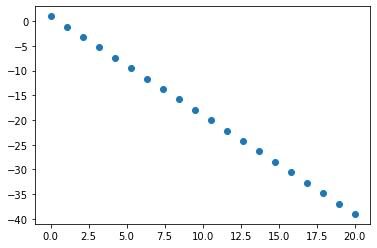

In [3]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

cost = 0
[[-0.11014672 -1.91860674]]


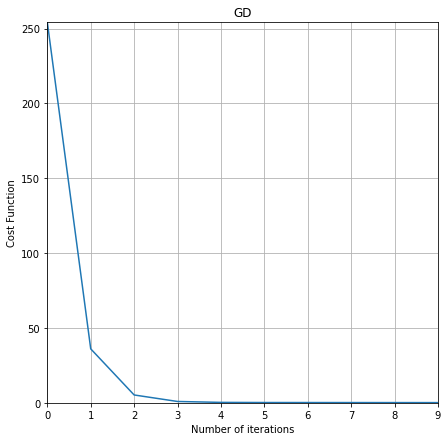

In [4]:
alpha = 0.01
def LR_multi_variable(X,y,alpha,iterations):

    X = np.array(X).reshape(X.shape[0],X.shape[1])
    y = np.array(y).reshape(len(y),1)
    m = X.shape[0]
    n = X.shape[1]
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,X],axis=1) 
    thetas = np.zeros(n+1).reshape(1,n+1)
    cost = np.zeros(iterations)
    for i in range(iterations):
        
        h = x_c@thetas.T
        grad = (alpha * ((h-y).T)@x_c) * (1/m)
        thetas = thetas - grad
        J = (h-y).T@(h-y) * (1/(2*m))
        cost[i] = J 
        if np.linalg.norm(thetas)<0.01:
            print('grad = 0')
            break
        elif (i>1):
            if np.linalg.norm(cost[i]-cost[i-1])<0.001:
                print('cost = 0')
                break

    plt.figure(figsize=(7, 7))
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.axis([0,i,0,cost.max()])
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    return thetas,cost
thetas,cost = LR_multi_variable(X,y,alpha,200)
print(thetas)

cost = 0


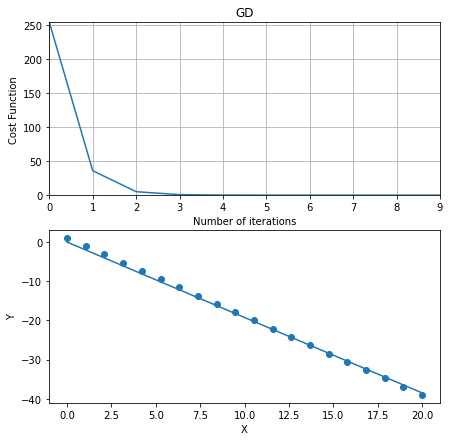

In [5]:
alpha = 0.01
def LR_single_variable(X,y,alpha,iterations):
    X = np.array(X).reshape(len(X),1)
    y = np.array(y).reshape(len(y),1)
    m = len(X)
    n = 2
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,X],axis=1) 
    theta_0 = 0
    theta_1 = 0
    thetas = np.array([theta_0,theta_1]).reshape(1,n)
    cost = np.zeros(iterations)
    theta0 = []
    theta1 = []
    c = 0
    for i in range(iterations):
        
        h = x_c@thetas.T
        grad = (alpha * ((h-y).T)@x_c) * (1/m)
        thetas = thetas - grad
        J = (h-y).T@(h-y) * (1/(2*m))
        theta0.append(thetas[0,0])
        theta1.append(thetas[0,1])
        cost[i] = J
        if np.linalg.norm(thetas)<0.01:
            print('grad = 0')
            break
        elif (i>1):
            if np.linalg.norm(cost[i]-cost[i-1])<0.001:
                print('cost = 0')
                break
                
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    cost = cost[:i+1]
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.axis([0,i,0,cost.max()])
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(X,y)
    plt.plot(X,h)
    #plt.axis('off')
    
    return thetas,cost,h,theta0,theta1
thetas,cost,h,theta0,theta1 = LR_single_variable(X,y,alpha,20)

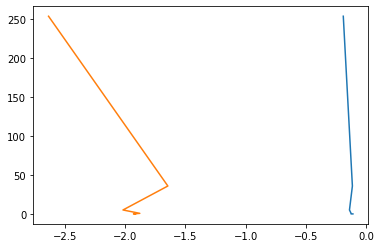

In [6]:
plt.plot(theta0,cost)
plt.plot(theta1,cost)

In [7]:
theta1 = np.array(theta1).reshape(1,len(theta1))
x1 = X@theta1
theta0 = np.array(theta0).reshape(1,len(theta0))
x0 = X@theta0

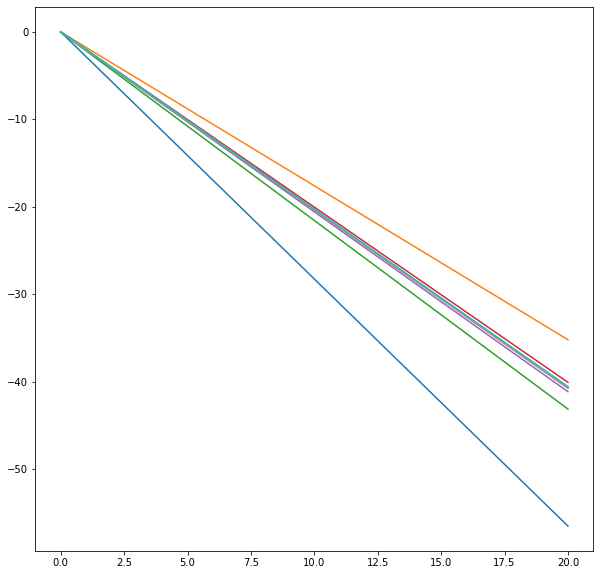

In [8]:
out = x0+x1
plt.figure(figsize=(10,10))
plt.plot(X,out)
plt.show()

In [9]:
m = X.shape[0]
x_c = np.ones(m).reshape(m,1)
x_c = np.concatenate([x_c,X],axis=1) 
y_pred_GD = x_c@thetas.T
r2_score(y,y_pred_GD)

0.9977483867158106

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

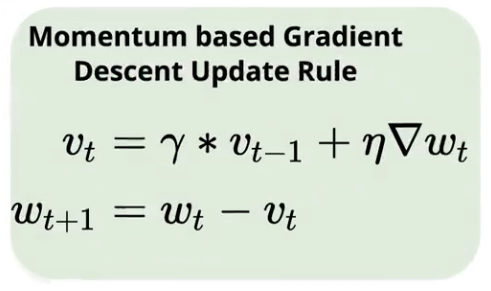

#### γ takes values between 0 and 1.
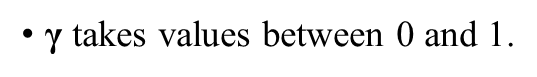

cost = 0
[[-0.06929232 -1.9210983 ]]


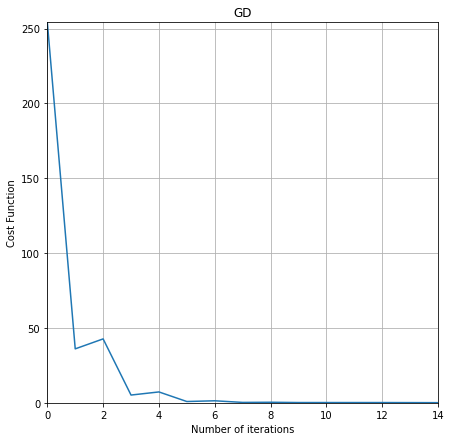

In [10]:
alpha = 0.01
gamma = 0.4
def LR_Momentum_multi_variable(X,y,alpha,iterations,gamma):

    X = np.array(X).reshape(X.shape[0],X.shape[1])
    y = np.array(y).reshape(len(y),1)
    m = X.shape[0]
    n = X.shape[1]
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,X],axis=1) 
    thetas = np.zeros(n+1).reshape(1,n+1)
    vt = np.zeros(n+1).reshape(1,n+1)
    cost = np.zeros(iterations)
    for i in range(iterations):
        
        h = x_c@thetas.T
        vt = gamma*vt + (alpha * ((h-y).T)@x_c) * (1/m)
        thetas = thetas - vt
        J = (h-y).T@(h-y) * (1/(2*m))
        cost[i] = J 
        if np.linalg.norm(thetas)<0.01:
            print('grad = 0')
            break
        elif (i>1):
            if np.linalg.norm(cost[i]-cost[i-1])<0.001:
                print('cost = 0')
                break

    plt.figure(figsize=(7, 7))
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.axis([0,i,0,cost.max()])
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    return thetas,cost
thetas,cost = LR_Momentum_multi_variable(X,y,alpha,200,gamma)
print(thetas)

In [11]:
m = X.shape[0]
x_c = np.ones(m).reshape(m,1)
x_c = np.concatenate([x_c,X],axis=1) 
y_pred_GD = x_c@thetas.T
r2_score(y,y_pred_GD)

0.997910583696375

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

cost = 0
value of theta: 
[[-0.11014672 -1.91860674]]
-----------------
r2_score: 
0.9977483867158106
*****************
*****************
cost = 0
value of theta: 
[[-0.1171882  -1.91871842]]
-----------------
r2_score: 
0.9977196802680738
*****************
*****************
cost = 0
value of theta: 
[[-0.04592902 -1.92341685]]
-----------------
r2_score: 
0.9980013846349916
*****************
*****************
cost = 0
value of theta: 
[[-0.09932556 -1.92126494]]
-----------------
r2_score: 
0.9977897550269386
*****************
*****************
cost = 0
value of theta: 
[[-0.06929232 -1.9210983 ]]
-----------------
r2_score: 
0.997910583696375
*****************
*****************
cost = 0
value of theta: 
[[ 0.17961049 -1.9399309 ]]
-----------------
r2_score: 
0.9987703967803216
*****************
*****************
cost = 0
value of theta: 
[[ 0.02755085 -1.92850174]]
-----------------
r2_score: 
0.9982721813423522
*****************
*****************
cost = 0
value of theta: 
[[ 0.1538

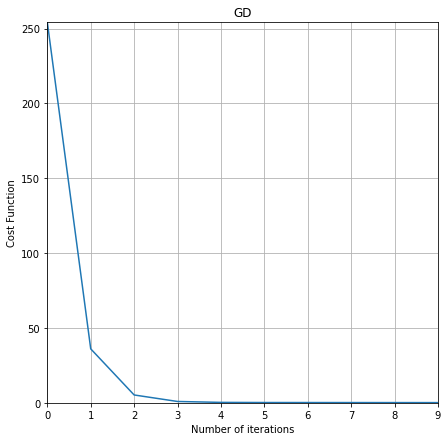

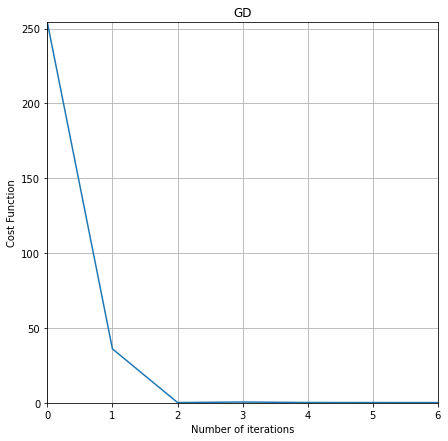

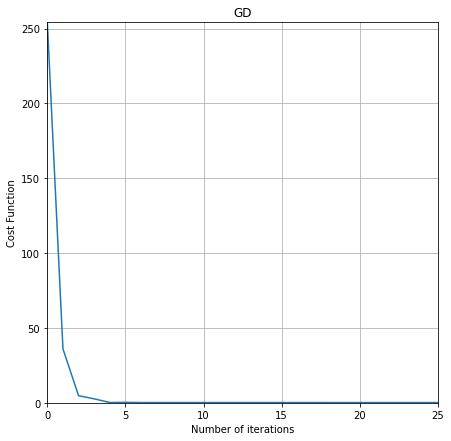

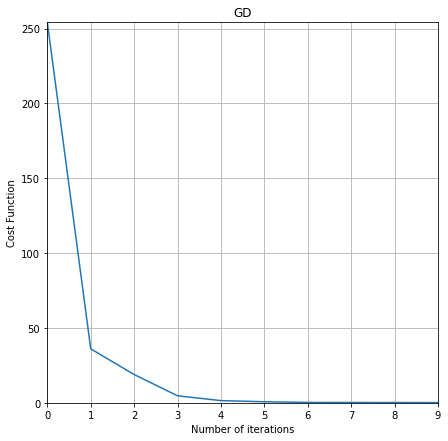

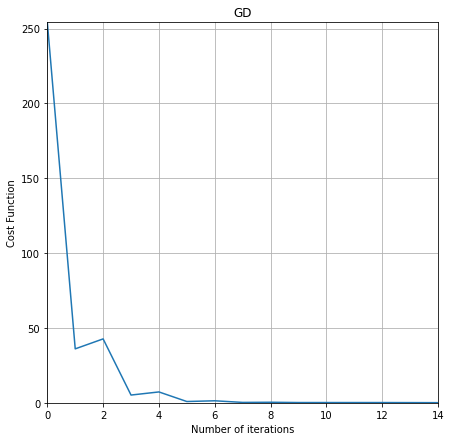

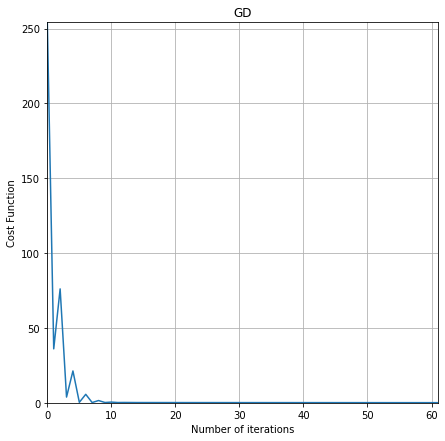

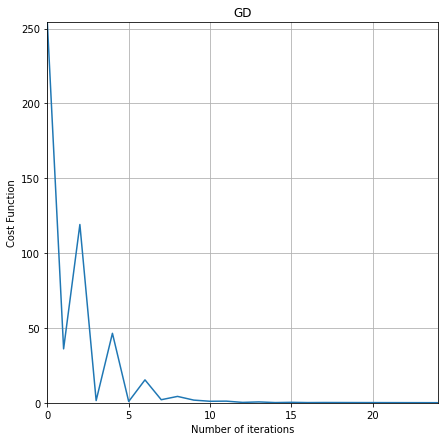

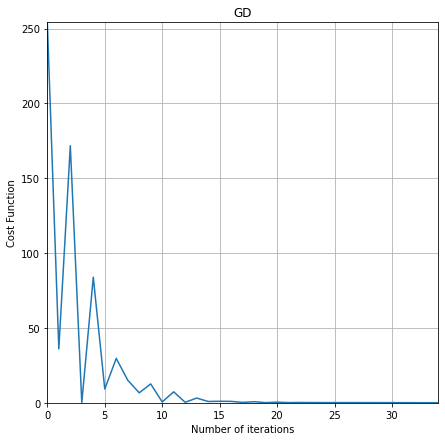

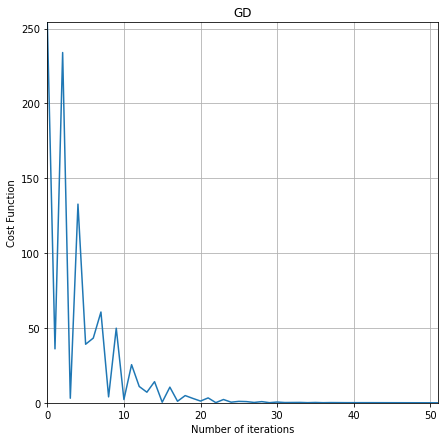

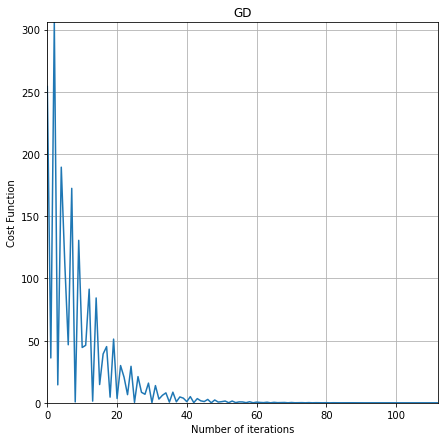

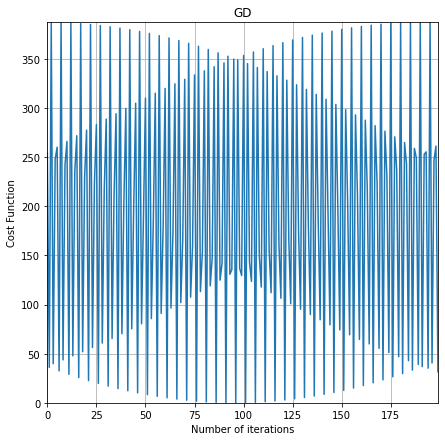

In [12]:
g = np.linspace(0,1,11)
for gamma in g:
    thetas,cost = LR_Momentum_multi_variable(X,y,alpha,200,gamma)
    print("value of theta: ")
    print(thetas)
    y_pred_GD = x_c@thetas.T
    print('-----------------')
    print('r2_score: ')
    print(r2_score(y,y_pred_GD))
    print('*****************')
    print('*****************')

### Update your Batch GD for one variable  implementation to be NAG and check your results

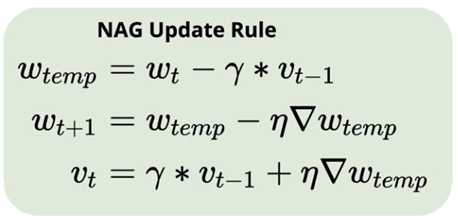

cost = 0
[[ 0.09386767 -1.93365269]]


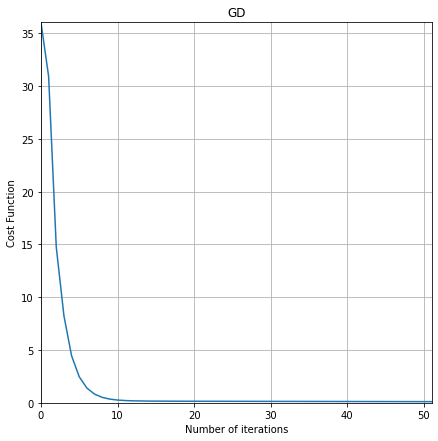

In [13]:
alpha = 0.01
gamma = 0.4
def LR_NAG_multi_variable(X,y,alpha,iterations,gamma):

    X = np.array(X).reshape(X.shape[0],X.shape[1])
    y = np.array(y).reshape(len(y),1)
    m = X.shape[0]
    n = X.shape[1]
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,X],axis=1) 
    thetas = np.zeros(n+1).reshape(1,n+1)
    vt = np.zeros(n+1).reshape(1,n+1)
    wtemp = np.zeros(n+1).reshape(1,n+1)
    cost = np.zeros(iterations)
    for i in range(iterations):
        
        wtemp = thetas - gamma*vt
        h = x_c@wtemp.T
        thetas = wtemp - (alpha * ((h-y).T)@x_c) * (1/m)
        vt = gamma*vt + (alpha * ((h-y).T)@x_c) * (1/m)
        hj = x_c@thetas.T
        J = (hj-y).T@(hj-y) * (1/(2*m))
        cost[i] = J 
        if np.linalg.norm(thetas)<0.01:
            print('grad = 0')
            break
        elif (i>1):
            if np.linalg.norm(cost[i]-cost[i-1])<0.001:
                print('cost = 0')
                break

    plt.figure(figsize=(7, 7))
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.axis([0,i,0,cost.max()])
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    return thetas,cost
thetas,cost = LR_NAG_multi_variable(X,y,alpha,200,gamma)
print(thetas)

In [14]:
m = X.shape[0]
x_c = np.ones(m).reshape(m,1)
x_c = np.concatenate([x_c,X],axis=1) 
y_pred_GD = x_c@thetas.T
r2_score(y,y_pred_GD)

0.9984999419891835

## Congratulations 
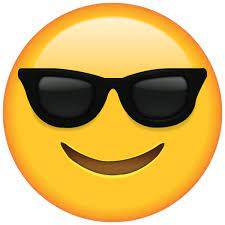